In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#import data#
df = pd.read_excel (r'D:\Data Science\Python\Github\Supervised Machine learning\Logistic Regression data.xlsx')
df.head()


,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)
X_test


,age
1,25
8,62
15,55
9,61
24,50
0,22


In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
model.predict_proba(X_test)

array([[0.83871709, 0.16128291],
       [0.06769174, 0.93230826],
       [0.14008378, 0.85991622],
       [0.07535108, 0.92464892],
       [0.224893  , 0.775107  ],
       [0.88027576, 0.11972424]])

In [27]:
model.score(X_test,y_test)

1.0

In [28]:
model.intercept_

array([-4.53480311])

In [16]:
model.coef_

array([[0.11544359]])

**Confusion Matrix**

In [33]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))


[[2 0]
 [0 4]]


**Model Score**

In [40]:
print(metrics.accuracy_score(y_test, y_pred))

1.0


**Define TP, TN, FP, FN**

In [48]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

**Classification Error**

In [50]:
print((FP + FN) / (TP + TN + FP + FN))

0.0


**Sensitivity**

In [51]:
print(TP / (TP + FN))

1.0


**Specificity**

In [53]:
print(TN / (TN + FP))

1.0


**ROC Curves and Area Under the Curve (AUC)**

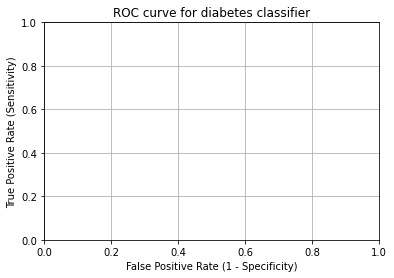

In [55]:
# store the predicted probabilities for class 1
y_pred_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [56]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

age = 38
prediction_function(age)

0.5164940131078768